## Part 1. Gaussian quadrature

The Gaussian quadrature method is one of the methods of numerical integration that allows you to increase the accuracy of integration, by using orthogonal polynomials and their roots as nodes.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

here $\omega$ is the weight function, this weight function determines the basis of orthogonal polynomials whose roots are used as integration nodes. If the function $f(x)$ is a polynomial, then such an integration method gives *exact* value for the integral.

For example, let's calculate the following integral:
$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Here function is already polynomial, so we put the weight function $\omega(x) = 1$. Then the calculation of the integral reduces to the sum in the polynomials roots witch corresponding to the weight function $\omega(x) = 1$. For example, here https://dlmf.nist.gov/18.3 you may see which basis of polynomials corresponds to your weight function.

You may see, that Legendre polynomials correspond to our weight function. Now go to the documentation https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Here, the function *roots_legendre* immediately gives you the roots of the Legendre polynomial and weight at this roots (for Legendre polynomials all these weight are ones).


### Task 1.1
(20% of the grade)

1. Calculate the exact value of the integral ([1](#mjx-eqn-eq1)) using a pen and paper (or in your mind). Remember it, then you will compare numerical results with it.

In [13]:
int_value=2/3

2. Calculate the value of the integral ([1](#mjx-eqn-eq1)) using the usual method of numerical integration on a uniform grid (for example, implemented by you in week_6_calculus homework). Estimate the number of nodes needed to achieve relative accuracy $10^{-10}$.

In [95]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline


def midpoint_rule(func, a, b, eps, double=False):
    I = (b-a)*func((a+b)/2)
    for N in range(5, 100000):
        if double == True:
            dots = np.linspace(a, b, 2*N)
        else:
            dots = np.linspace(a, b, N)
        points = (dots[1:]+dots[:-1])/2
        h = dots[1]-dots[0]
        I_new = h*np.sum(func(points))
        if abs(I_new-I)<eps:
            return I_new, N
        I = I_new
def ff(x):
    return 7*x**3-8*x**2-3*x+3
print(midpoint_rule(ff, -1, 1, eps = 1e-10))

(0.6666669037453725, 4744)


3. Calculate the integral ([1](#mjx-eqn-eq1)) using the roots of the Legendre polynomial from 1 to 6 degrees as nodes (to get roots and weigths use scipy.special.roots_legendre)

In [96]:
for n in range(1,7):
    xx,w = sp.roots_legendre(n)
    print(n,":"," I=",sum(w*ff(xx)))

1 :  I= 6.0
2 :  I= 0.6666666666666674
3 :  I= 0.6666666666666639
4 :  I= 0.6666666666666667
5 :  I= 0.6666666666666685
6 :  I= 0.6666666666666695


Compare the number of nodes needed to obtain the same accuracy in both numerical methods.

### Task 1.2
(20% of the grade)

Calculate the value of the same integral, but on the interval from 0 to 10.
$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Please note that you can no longer directly use Legendre polynomials, because they are defined for the interval (-1,1). But you can always make an *affine transformation* (a transformation that does not change the area) in order to go to the desired coordinate system.

In [97]:
#affine transformation: x = (t-5)|5, чтобы получить привычные пределы (-1,1) и тогда перед интегралом будет коэффициент 5 перед интегралом

def ff_new(t):
    res = 7 * (5 * t + 5)**3 - 8 * (5 * t + 5)**2 - 3 * (5 * t + 5) + 3
    return res
for n in range(1,7):
    tt,w = sp.roots_legendre(n)
    print(n,":"," I=",sum(5*w*ff_new(tt)))

1 :  I= 6630.0
2 :  I= 14713.333333333336
3 :  I= 14713.33333333333
4 :  I= 14713.333333333336
5 :  I= 14713.333333333332
6 :  I= 14713.333333333336


Compare the result with the exact value of the integral.

Как и в предудущем пункте, на n=2 результат данного метода дает более точное решение


### Task 1.3
(20% of the grade)

Calculate the value of the following integral:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
by using the corresponding basis of orthogonal polynomials. 
Find the degree of the polynomial (number of nodes) at which the accuracy of the integral starts to exceed the double floating point accuracy.

Сделав замену: $x=2\pi\nu$, получаем: $$\int_{-1}^1\frac{\cos (2 \pi  \nu)}{2 \sqrt{1-\nu^2}}dx=\frac{\pi J_{0}(2\pi)}{2}$$

In [98]:
for n in range(1,20):
    nu,w = sp.roots_chebyt(n)
    print(n,":"," I=", sum(w*np.cos(2* np.pi*nu)/2))

1 :  I= 1.5707963267948966
2 :  I= -0.4182329132681745
3 :  I= 1.2211694475711936
4 :  I= 0.11575359323141321
5 :  I= 0.37786106634872507
6 :  I= 0.34323498164389277
7 :  I= 0.34617799427660145
8 :  I= 0.3460026676271414
9 :  I= 0.34601041637332886
10 :  I= 0.3460101517706765
11 :  I= 0.3460101589691607
12 :  I= 0.3460101588093585
13 :  I= 0.3460101588123096
14 :  I= 0.3460101588122638
15 :  I= 0.34601015881226416
16 :  I= 0.3460101588122644
17 :  I= 0.3460101588122645
18 :  I= 0.34601015881226427
19 :  I= 0.34601015881226427


Точное решение: 0.3460101588122,
Поэтому можно сдлетаь вывод, что на n=18 разница порядка машинного $\epsilon$. Достаточная точность достигается уже на n=16

## Part 2. Fredholm equation

There are two types of Fredholm equations. 

1. Fredholm equation of the first kind:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Fredholm equation of the second kind:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Here higtlighted function $f(x)$ is unknown, kernel function $K(x, t)$ and given function $g(x)$, $\lambda$ is a real number. Numerically, Fredholm equations of the first kind are very ill-conditioned. We will consider equations of the second kind only.

The basic idea is to approximate the integral by some quadrature formula

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

with appropriate weights $w_j$ and nodes $t_j$ and $j=1, \dots, N$. The accuracy of the approximation is controlled by $N$.

This way, the FE is approximated by 

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Note that here $x$ is a continuous variable, and we only discretized $t$.


Evaluating this equation on the grid $x = t_k$, we obtain

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

where $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. This is nothing but a system of linear algebraic equations for the vector of $\color{blue}{f_j}$.

Its solution gives the values of the unknown function $f(x)$ at the discrete values $x=t_j$ for $j=1, \dots, N$.

### Task 2.1
(20% of the grade)

Solve an example Fredholm equation of the second kind

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Here $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, the kernel is $K(x, t) = 1$ and the right-hand side $g(x) = \sin(\pi x)$.

In fact, the exact solution is (В. А. Попов, Сборник задач по интегральным уравнениям, 2006, стр. 5)

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$


For the integral, we can use a Gaussian quadrature with the weight function $w(x) = 1$ on $(0, 1)$. Looking at http://dlmf.nist.gov/18.3, and find the corresponding function in *scipy.special* (pay attention to the integration interval).

Compare the obtained function values with the true solution for different values of $N$. What value of $N$ can you stop at?

In [99]:
def f(x):
    return np.sin(np.pi*x)+2/np.pi

def f_1(n):
    xx, w = sp.roots_sh_legendre(n)
    f = np.linalg.solve(np.eye(n)-1/2*w, np.sin(np.pi*xx))
    return xx, f

for n in range(1,10):
    xx, g = f_1(n)
    err = np.linalg.norm(g - f(xx))
    print(n,":", " f =", sum(g), "f_real =", sum(f(xx)), " err =", err)

1 :  f = 2.0 f_real = 1.6366197723675815  err = 0.3633802276324185
2 :  f = 2.4647620339182303 f_real = 2.505620561694278  err = 0.02889134205974216
3 :  f = 3.6046083901798758 f_real = 3.603282075382677  err = 0.0007657482051929123
4 :  f = 4.700775311399325 f_real = 4.700795392350633  err = 1.004047565394961e-05
5 :  f = 5.803005035763186 f_real = 5.803004860239997  err = 7.849635643883314e-08
6 :  f = 6.907430465574742 f_real = 6.9074304665730795  err = 4.075690888101765e-10
7 :  f = 8.013101526128477 f_real = 8.01310152612449  err = 1.5066630835619936e-12
8 :  f = 9.119537696109074 f_real = 9.119537696109079  err = 2.6967223568632722e-15
9 :  f = 10.226476455409507 f_real = 10.226476455409507  err = 3.6821932062951477e-16



### Task 2.2
(20% of the grade)

An obvious issue with the privious result for $f(x)$ that it returns the solution on a fixed set of points. We do not control precise positions of these points.

1. First, let's try to interpolate the values obtained in the previous task to a uniform grid of length 50. You may use any interpolation method. Compare the interpolation values with exact solution values.

5 :   error = 0.01865601743192529
10 :   error = 0.00035126845088726954
15 :   error = 7.081487243347623e-05
20 :   error = 2.2846670136821968e-05
25 :   error = 9.390085190516405e-06
30 :   error = 4.599874456404091e-06
35 :   error = 2.5736129118423583e-06
40 :   error = 1.4491237560646242e-06
45 :   error = 9.271597683515008e-07
50 :   error = 6.064731338075147e-07
55 :   error = 4.1923196618435313e-07
60 :   error = 2.915295118105931e-07
65 :   error = 2.2078913403870969e-07
70 :   error = 1.8652903708399143e-07
75 :   error = 1.8245140877933346e-07
80 :   error = 8.154027366439042e-08
85 :   error = 7.456002788044169e-08
90 :   error = 5.9092508244270505e-08
95 :   error = 4.736424139816314e-08


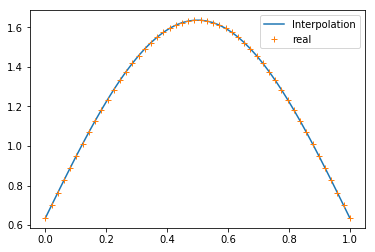

In [148]:
array = np.linspace(0, 1, 50)
for n in range(5,100,5):
    xx, f = f_1(n)
    interpolation = CubicSpline(xx, f)
    print(n,":", "  error =", np.linalg.norm(f_real(array) - interpolation(array))) 
plt.plot(array, interpolation(array), label="Interpolation")
plt.plot(array, f_real(array), '+', label="real")
plt.legend()

2. Now use the following formula to calculate the function at points of the same uniform grid.
$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$
Again, compare the interpolation values with the exact solution values, and also with the direct interpolation method.

1 :   error = 2.569486231079945
2 :   error = 0.14445671029871074
3 :   error = 0.0031261539569578723
4 :   error = 3.549844210799738e-05
5 :   error = 2.4822727484216415e-07
6 :   error = 1.1765510762498843e-09
7 :   error = 4.027444266765912e-12
8 :   error = 7.0058503728469556e-15
9 :   error = 0.0


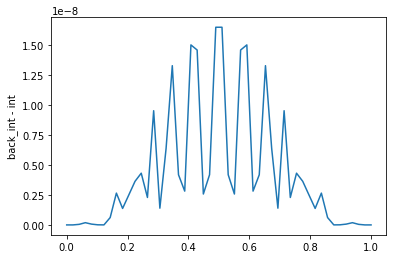

In [171]:
def back_f(x,f):
    n = len(f)
    _, w = sp.roots_sh_legendre(n)
    return np.sin(np.pi*x)+(w @ f /2)

for i in range(1,10):
    xx, f= f_1(i)
    print(i,":", "  error =", np.linalg.norm(f_real(array) - back_f(array, f)))
plt.show()
plt.plot(array, abs(back_f(array, f)- interpolation(array)))
plt.ylabel("back_int - int")
plt.show()
